<a href="https://colab.research.google.com/github/detayans/Logistic-Regression-Project/blob/main/ProjectLogisticReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section 1 : Data loading

## Part I: Load Dataset to the notebook


In [147]:
# Import the dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


##Part II : Explore and make note of Attribute Information from UCI



In [148]:
#Load the data set
data = pd.read_csv("/content/portu_banking_final.csv")
data.head()



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [149]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [150]:
data.shape

(41188, 21)

## Part III : Explore and make note of Attribute Information from UCI



y column is whether a customer purchased the term deposit or not. 
0 represent that customer did not purchased the term deposit and 1 represent that customer purchased the term deposit.

In [151]:
data.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

## Part IV : What is the ratio of the two classes ? Are they balanced ?



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


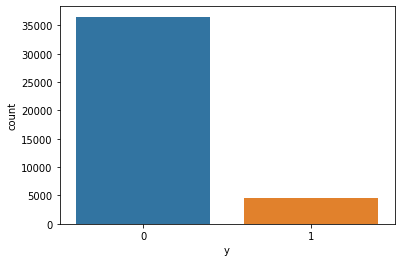

In [152]:
sns.countplot(data['y'])
plt.show()

the counts of 0 is 36548 and counts of 1 is 4640 which is very less than counts of 0 hence the output is unbalance.

# Section II : Data Cleaning

## Part I : Get the dtypes of all the columns of our dataset





In [153]:
data.dtypes

age                object
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays             float64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object

# Part II : Refering to the UCI data description , explore the data in your columns and check if there are any errors

In [154]:
data.age.unique()

array(['44', '53', '28', '39', '55', '30', '37', '36', '27', '34', '41',
       '33', '26', '52', '35', '40', '32', '49', '38', '47', '46', '29',
       '54', '42', '72', '48', '43', '56', '31', '24', '68', '59', '50',
       '45', '35-30', '25', '57', '63', '58', '60', '30-35', '64', '51',
       '23', '20', '74', '80', '61', '25-30', '62', '75', '21', '82',
       '77', '18-25', '30-32', '70', '50-55', '76', '73', '66', '22',
       '71', '19', '79', '88', '65', '67', '81', '18', '84', '69', '98',
       '85', '83', '78', '92', '45-50', '20-25', '20-40', '35-40', '86',
       '94', '17', '91', '89', '87', '95', '30-40', 56, 39, 30, 53, 37,
       22, 45, 31, 24, 50, 58, 33, 27, 28, 32, 51, 41, 49, 43, 44, 35, 29,
       26, 57, 25, 42, 48, 46, 67, 38, 34, 54, 40, 23, 47, 62, 75, 55, 36,
       52, 59, 78, 70, 60, 20, 66, 61, 21, 88, 18, 68, 71, 73, 80, 79, 63,
       76, 83, 65, 19, 86, 17, 72, 69, 81, 64, 77, 74, 85, 82],
      dtype=object)

In [155]:
# replacing all the age range with theire respective mean value
data['age']=data['age'].replace(['35-30'],33)
data['age']=data['age'].replace(['30-35'],33)
data['age']=data['age'].replace(['25-30'],28)
data['age']=data['age'].replace(['18-25'],22)
data['age']=data['age'].replace(['30-32'],31)
data['age']=data['age'].replace(['50-55'],53)
data['age']=data['age'].replace(['50-55'],53)
data['age']=data['age'].replace(['45-50'],48)
data['age']=data['age'].replace(['20-25'],23)
data['age']=data['age'].replace(['20-40'],30)
data['age']=data['age'].replace(['35-40'],38)
data['age']=data['age'].replace(['30-40'],33)


In [156]:
data['age'] = data['age'].apply(pd.to_numeric)

In [157]:
data.age.unique()

array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
       25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77,
       22, 70, 76, 73, 66, 71, 19, 79, 88, 65, 67, 81, 18, 84, 69, 98, 85,
       83, 78, 92, 86, 94, 17, 91, 89, 87, 95])

In [158]:
print(data.age.dtype)

int64


In [159]:
data.marital.value_counts()

married     24923
single      11565
divorced     4608
unknown        80
M               5
D               4
S               3
Name: marital, dtype: int64

In [160]:
data['marital']=data["marital"].replace("unknown","married")
data['marital']=data["marital"].replace("M","married")
data['marital']=data["marital"].replace("S","single")
data['marital']=data["marital"].replace("D","divorced")
data.marital.value_counts()


married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

In [161]:
data.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6035
professional.course     5243
basic.4y                4164
basic.6y                2286
unknown                 1731
illiterate                18
basic-4y                  12
basic-9y                  10
basic-6y                   6
Name: education, dtype: int64

In [162]:
data['education']=data["education"].replace("unknown","university.degree")
data['education']=data["education"].replace("basic-4y","basic.4y")
data['education']=data["education"].replace("basic-6y","basic.6y")
data['education']=data["education"].replace("basic-9y","basic.9y")
data.education.value_counts()

university.degree      13899
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: education, dtype: int64

In [163]:
data.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [164]:
data['default']=data["default"].replace("unknown","no")
data.default.value_counts()


no     41185
yes        3
Name: default, dtype: int64

In [165]:
data.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [166]:
data['housing']=data["housing"].replace("unknown","yes")
data.housing.value_counts()


yes    22566
no     18622
Name: housing, dtype: int64

In [167]:
data.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [168]:
data['loan']=data["loan"].replace("unknown","no")
data.loan.value_counts()

no     34940
yes     6248
Name: loan, dtype: int64

In [169]:
data.contact.value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [170]:
data.emp_var_rate.value_counts

<bound method IndexOpsMixin.value_counts of 0        1.4
1       -0.1
2       -1.7
3       -1.8
4       -2.9
        ... 
41183    1.4
41184    1.1
41185    1.1
41186   -3.4
41187    1.1
Name: emp_var_rate, Length: 41188, dtype: float64>

In [171]:
data.cons_price_idx.value_counts

<bound method IndexOpsMixin.value_counts of 0        93.444
1        93.200
2        94.055
3        93.075
4        92.201
          ...  
41183    94.465
41184    93.994
41185    93.994
41186    92.431
41187    93.994
Name: cons_price_idx, Length: 41188, dtype: float64>

In [172]:
data.cons_conf_idx.value_counts

<bound method IndexOpsMixin.value_counts of 0       -36.1
1       -42.0
2       -39.8
3       -47.1
4       -31.4
         ... 
41183   -41.8
41184   -36.4
41185   -36.4
41186   -26.9
41187   -36.4
Name: cons_conf_idx, Length: 41188, dtype: float64>

In [173]:
data.euribor3m.value_counts

<bound method IndexOpsMixin.value_counts of 0        4.963
1        4.021
2        0.729
3        1.405
4        0.869
         ...  
41183    4.866
41184    4.860
41185    4.857
41186    0.742
41187    4.859
Name: euribor3m, Length: 41188, dtype: float64>

In [174]:
data.nr_employed.value_counts

<bound method IndexOpsMixin.value_counts of 0        5228.1
1        5195.8
2        4991.6
3        5099.1
4        5076.2
          ...  
41183    5228.1
41184    5191.0
41185    5191.0
41186    5017.5
41187    5191.0
Name: nr_employed, Length: 41188, dtype: float64>

In [175]:
data.y.value_counts

<bound method IndexOpsMixin.value_counts of 0        0
1        0
2        1
3        0
4        1
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: y, Length: 41188, dtype: int64>

In [176]:
data.job.value_counts()


admin.           10420
blue-collar       9253
technician        6742
services          3966
management        2923
retired           1717
entrepreneur      1456
self-employed     1421
housemaid         1059
unemployed        1014
student            873
unknown            329
RETIRED              3
SERVICES             3
ADMIN.               2
STUDENT              2
MANAGEMENT           1
HOUSEMAID            1
UNKNOWN              1
BLUE-COLLAR          1
TECHNICIAN           1
Name: job, dtype: int64

In [177]:
data['job']=data["job"].replace("unknown","admin.")
data['job']=data["job"].replace("UNKNOWN","admin.")
data['job']=data["job"].replace("ADMIN.","admin.")

data['job']=data["job"].replace("SERVICES","services")
data['job']=data["job"].replace("RETIRED","retired")
data['job']=data["job"].replace("STUDENT","student")
data['job']=data["job"].replace("TECHNICIAN","technician")
data['job']=data["job"].replace("HOUSEMAID","housemaid")
data['job']=data["job"].replace("MANAGEMENT","management")
data['job']=data["job"].replace("BLUE-COLLAR","blue-collar")

data.job.value_counts()


admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

# Section III : Exploring data with Group by

In [178]:
data[['job','y']].groupby('job').mean()

,y
job,
admin.,0.129185
blue-collar,0.068943
entrepreneur,0.085165
housemaid,0.100000
management,0.112175
retired,0.252326
self-employed,0.104856
services,0.081381
student,0.314286


In [179]:
data[['marital','y']].groupby('marital').mean()

,y
marital,
divorced,0.103209
married,0.101727
single,0.140041


In [180]:
data[['education','y']].groupby('education').mean()

,y
education,
basic.4y,0.102490
basic.6y,0.082024
basic.9y,0.078246
high.school,0.108355
illiterate,0.222222
professional.course,0.113485
university.degree,0.138211


# Section IV : Exploratory Data Analysis

Part I : Create bar graphs to the frequency of purchase with respect to the job , martial etc

(array([ 9254.,  6743.,  2924.,  3969.,  1720., 10752.,  1060.,  1014.,
         1456.,  2296.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

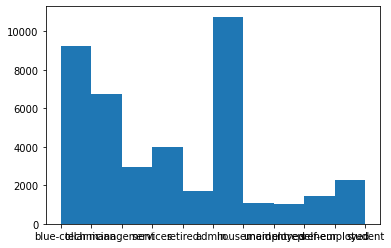

In [181]:
plt.hist(data['job'])

(array([25008.,     0.,     0.,     0.,     0., 11568.,     0.,     0.,
            0.,  4612.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

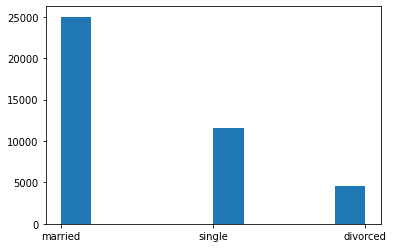

In [182]:
plt.hist(data['marital'])

# Section IV : Categorical Variable Encoding

In [183]:
bank_catg=data.select_dtypes(include='object')
bank_catg.drop(['month','day_of_week'],axis=1,inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [184]:
cols = bank_catg.columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],
      dtype='object')

In [185]:
bank_data = data


In [186]:
for i in cols:
  dummies = pd.get_dummies(data[i], drop_first = True)
  bank_data = pd.concat([bank_data,dummies],axis='columns')

In [187]:
dummies

,nonexistent,success
0,1,0
1,1,0
2,0,1
3,1,0
4,0,1
...,...,...
41183,1,0
41184,1,0
41185,1,0
41186,1,0


In [188]:
bank_data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,yes,yes,yes,telephone,nonexistent,success
0,44,blue-collar,married,basic.4y,no,yes,no,cellular,aug,thu,210,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,technician,married,university.degree,no,no,no,cellular,nov,fri,138,1,999.0,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6.0,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3.0,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,no,no,yes,telephone,jun,thu,222,1,999.0,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,1,0
41184,31,housemaid,married,basic.4y,no,no,no,telephone,may,thu,196,2,999.0,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
41185,42,admin.,single,university.degree,no,yes,yes,telephone,may,wed,62,3,999.0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,200,2,999.0,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,0


In [189]:
bank_data.housemaid.value_counts()

0    40128
1     1060
Name: housemaid, dtype: int64

In [190]:
bank_data=bank_data.drop(['job', 'marital','month','day_of_week','education', 'default', 'housing', 'loan', 'contact',
       'poutcome'],axis=1)

In [191]:
bank_data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,married,single,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,yes,yes,yes,telephone,nonexistent,success
0,44,210,1,999.0,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999.0,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,28,339,3,6.0,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
3,39,185,2,999.0,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,55,137,1,3.0,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1


# Section V : Preliminary Training



In [192]:
X = bank_data.drop(['y'], axis = 1)
y = bank_data['y']


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)


In [194]:
from sklearn.metrics import classification_report
model=LogisticRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
LR=model.score(X_test,y_test)
print("Accuracy",LR)
print(classification_report(y_test,y_predict))


Accuracy 0.907016266084001
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     10924
           1       0.67      0.39      0.49      1433

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.89      0.91      0.90     12357



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
